# Multiple variables
In previous example we had target functions with only one variable so that they could be aproximated by a hyphothesis function $h(x)=a+bx$. What if we had multiple variables instead, say hell of a lot of variables:

$$h(x)=\sum_{i=0}^{n}w_ix_i, \quad \text{where $x_0=1$}$$

The letter **w** comes from the term **weight** which is used in machine learning to mean a constant multiplying a variable in the hyphothesis function. The first w ($w_0$) is also called **bias** because it's independent of a variable ($x_0$ is always $1$).

In [1]:
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for visualization (plotting)

# to display plots inline (with the rest of the output) rather than in a separate window
%matplotlib inline

Here is a recap of the code from the previous part dealing with univariate target functions:

In [2]:
class Machine:
    a = 0
    b = 0
    def h(self, x):
        return self.a + self.b * x
    
def gradient_descent(machine, t, training_set, alpha, iterations):
    a_values = []
    b_values = []
    n = training_set.size
    for i in range(0, iterations):
        a_values.append(machine.a)
        b_values.append(machine.b)
        da = 0
        db = 0
        for x in training_set:
            da += machine.h(x) - t(x)
            db += (machine.h(x) - t(x)) * x
        machine.a -= alpha * da / n
        machine.b -= alpha * db / n

def trainer(t, n, alpha, iterations, seed):
    np.random.seed(seed)
    training_set = np.random.randint(-5, 6, n)
    machine = Machine()
    gradient_descent(machine, t, training_set, alpha, iterations)
    print(machine.a)
    print(machine.b)

trainer(lambda x: 3 + 2 * x, n = 3, alpha = 0.2, iterations = 30, seed = 876)

2.99597457535
2.00016983747


In this section we will modify the code to handle target functions of multiple variables. We already have two for loops so we really don't want to add another loop to go through all the variables (we also don't want to write them all separately). So we'll introduce a litte bit of linear algebra to prevent the additional for loop.

$$
\begin{align}
w_j &= w_j - \frac{\alpha}{m}\displaystyle\sum_{i=1}^m(h(x_i)-t(x_i))x_i \\
\end{align}
$$

In [3]:
def t_old(x): return 3 + 2 * x
def t(x):
    w = np.array([3,2])
    return w.dot(x)

print(t_old(4))
print(t(np.array([1, 4])))

11
11


In [17]:
class Machine:
    def __init__(self, n):
        self.w = np.zeros(n + 1)
    def h(self, x):
        return np.sum(self.w * x)
    
def t(x):
    w = [3,2]
    return np.sum(w * x)

def gradient_descent(machine, t, training_set, alpha, iterations):
    m = training_set.shape[0]
    n = training_set.shape[1]
    for i in range(0, iterations):
        d = np.zeros(n)
        for x in training_set:
            d += (machine.h(x) - t(x)) * x   
        machine.w -= alpha * d / m

def trainer(t, m, alpha, iterations, seed, n):
    np.random.seed(seed)
    training_set = np.random.randint(-5, 6, (m,n))
    training_set = np.insert(training_set, 0, 1, axis=1)
    print(training_set)
    machine = Machine(n)
    gradient_descent(machine, t, training_set, alpha, iterations)
    print(machine.w)

trainer(t, m = 3, alpha = 0.2, iterations = 30, seed = 876, n = 1)

[[ 1 -3]
 [ 1  0]
 [ 1  4]]
[ 2.99597458  2.00016984]


In [19]:
class Machine:
    def __init__(self, n):
        self.w = np.zeros(n + 1)
    def h(self, x):
        return (self.w * x).sum(axis=1)
    
def t(x):
    w = [3,2]
    return (w * x).sum(axis=1)

def gradient_descent(machine, t, training_set, alpha, iterations):
    m = training_set.shape[0]
    n = training_set.shape[1]
    for i in range(0, iterations):
        d = (machine.h(training_set) - t(training_set)).dot(training_set)
        machine.w -= alpha * d / m

def trainer(t, m, alpha, iterations, seed, n):
    np.random.seed(seed)
    training_set = np.random.randint(-5, 6, (m,n))
    training_set = np.insert(training_set, 0, 1, axis=1)
    machine = Machine(n)
    gradient_descent(machine, t, training_set, alpha, iterations)
    print(machine.w)

trainer(t, m = 3, alpha = 0.2, iterations = 30, seed = 876, n = 1)

[ 2.99597458  2.00016984]


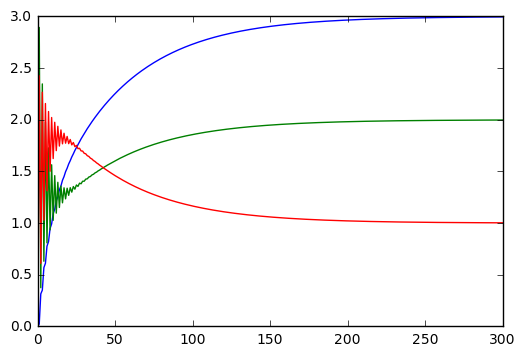

[ 2.99551538  1.99760934  1.00276445]


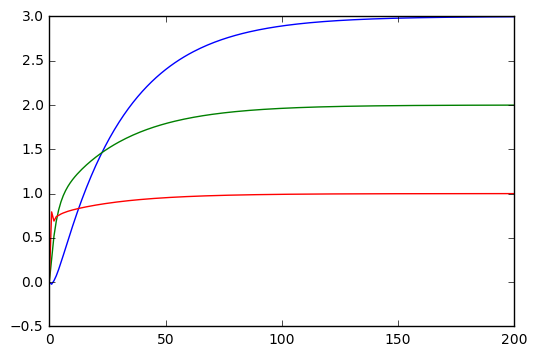

[ 2.9965378   1.99879025  0.9997328 ]


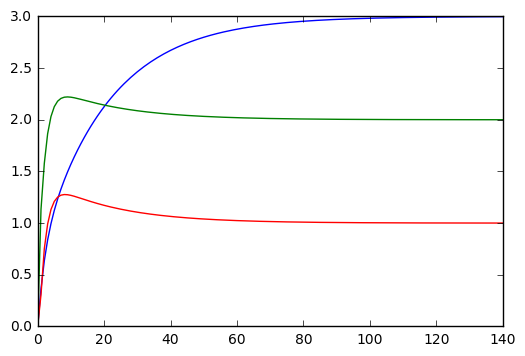

[ 2.99753369  2.00040256  1.00048582]


In [75]:
class Machine:
    def __init__(self, n):
        self.w = np.zeros(n + 1)
    def h(self, x):
        return (self.w * x).sum(axis=1)
    
def t(x):
    #seed = 123
    #np.random.seed(seed)
    #w = np.random.randint(-5, 6, n)
    w = [3,2,1]
    #print(x)
    #print(w * x)
    #print((w * x).sum(axis=1))
    #return np.sum(w * x)
    return (w * x).sum(axis=1)

def gradient_descent(machine, t, training_set, alpha, iterations):
    m = training_set.shape[0]
    n = training_set.shape[1]
    values = []
    values.append(np.copy(machine.w))
    for i in range(0, iterations):
        d = (machine.h(training_set) - t(training_set)).dot(training_set)
        machine.w -= alpha * d / m
        values.append(np.copy(machine.w))
    #print(values)    
    plt.plot(values)
    plt.show()        

def trainer(t, m, alpha, iterations, seed, n):
    np.random.seed(seed)
    training_set = np.random.randint(-5, 6, (m,n))
    training_set = np.insert(training_set, 0, 1, axis=1)
    machine = Machine(n)
    gradient_descent(machine, t, training_set, alpha, iterations)
    print(machine.w)

trainer(t, m = 3, alpha = 0.07, iterations = 300, seed = 876, n = 2)
trainer(t, m = 3, alpha = 0.07, iterations = 200, seed = 123, n = 2)
trainer(t, m = 10, alpha = 0.07, iterations = 140, seed = 5345, n = 2)